### Stereo Disparity 01

##### Import statements

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from helper import *
from cmath import inf
from skimage.metrics import structural_similarity

##### Stereo disparity algorithm

In [2]:
# left: Left Image
# right: Right Image
# flag: True if Right Disparity, False Otherwise
# disparity_set: Set of Possible Disparity
# kernel_size: Gaussian Kernel Size
# sigma: Sigma of Gaussian Kernel
# laplacian: True for Using Laplacian of Gaussian

def stereo_disparity( left, right, flag=True, disparity_set=range( 200), sigma=1, laplacian=False):
	
	width, height = left.shape

	M_min = np.ones( ( width, height)) * inf
	D = np.copy( M_min)

	for s in disparity_set:
		shift = s if flag else -s

		affine = np.float32( [
			[ 1, 0, shift],
			[ 0, 1, 0]
		])

		shifted = cv2.warpAffine( right, affine, ( right.shape[ 1], right.shape[ 0]))

		diff = np.abs( left - shifted)

		M = cv2.GaussianBlur( diff, ( 0, 0), sigma)

		if laplacian:
			M = cv2.Laplacian( M, cv2.CV_64F)

		D[ M < M_min] = s
		M_min = np.min( [ M, M_min], axis=0)
		
	return D

##### Loading images and true disparity maps

Left Camera Matrix
[[1.73374e+03 0.00000e+00 7.92270e+02]
 [0.00000e+00 1.73374e+03 5.41890e+02]
 [0.00000e+00 0.00000e+00 1.00000e+00]]
Right Camera Matrix
[[1.73374e+03 0.00000e+00 7.92270e+02]
 [0.00000e+00 1.73374e+03 5.41890e+02]
 [0.00000e+00 0.00000e+00 1.00000e+00]]
Baseline: 536.62
Image Size (Width, Height): (1920.0, 1080.0)
Conservative Bound of Disparity Levels: [0, 169.0]
Tight Bound of Min and Max Disparities: [55.0, 142.0]


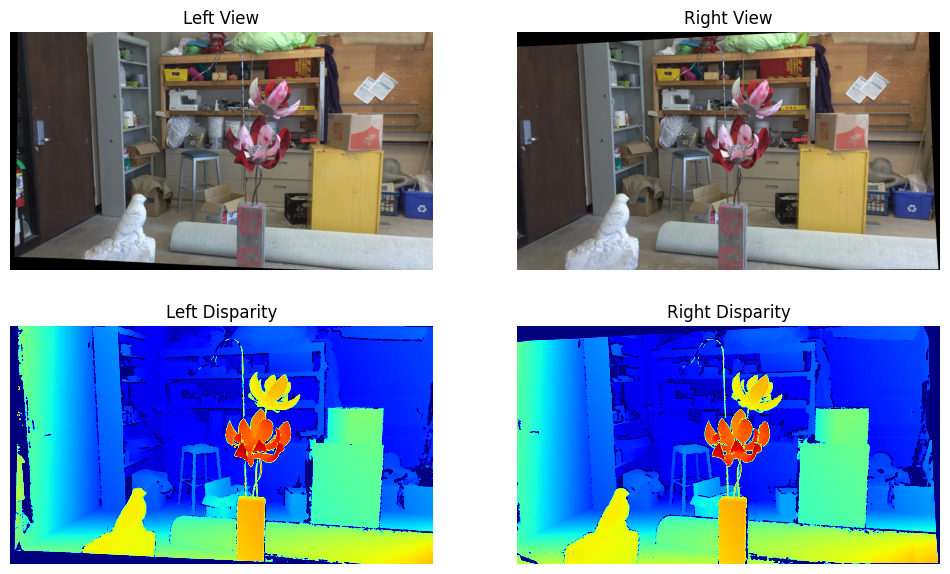

In [3]:
path = "2021 mobile datasets/artroom1"

calib = read_calib( f"{ path}/calib.txt")
disp_L, scale = read_pfm( f"{ path}/disp0.pfm")
disp_R, _ = read_pfm( f"{ path}/disp1.pfm")
img_L_orig = Image.open( f"{ path}/im0.png")
img_R_orig = Image.open( f"{ path}/im1.png")
img_L = np.array( img_L_orig.convert( "L"))
img_R = np.array( img_R_orig.convert( "L"))

print_calib( calib)

display( img_L_orig, img_R_orig, disp_L, disp_R, scale, calib[ "vmin"], calib[ "vmax"])

##### Using gaussain smoothing kernel

SSIM with Right Disparity: 0.17697034108013535
SSIM with Left Disparity: 0.15397904389061284


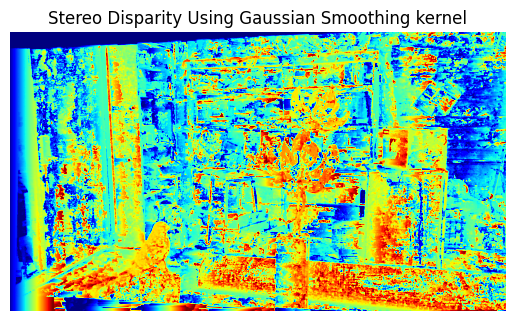

In [4]:
disparity = stereo_disparity(
	left=img_L,
	right=img_R,
	flag=True,
	disparity_set=range( int( calib[ "ndisp"])),
	laplacian=False
)

ssim_R = structural_similarity( disparity, disp_R, data_range=calib[ "ndisp"])
ssim_L = structural_similarity( disparity, disp_L, data_range=calib[ "ndisp"])

print( f"SSIM with Right Disparity: { ssim_R}")
print( f"SSIM with Left Disparity: { ssim_L}")

plt.imshow( disparity, cmap="jet")
plt.title( f"Stereo Disparity Using Gaussian Smoothing kernel")
plt.axis( "off")
plt.show()

##### Using laplacian of gaussian

SSIM with Right Disparity: 0.08258514165980174
SSIM with Left Disparity: 0.05148803257097488


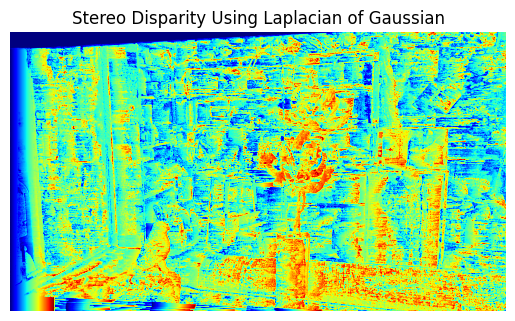

In [5]:
disparity = stereo_disparity(
	left=img_L,
	right=img_R,
	flag=True,
	disparity_set=range( int( calib[ "ndisp"])),
	laplacian=True
)

ssim_R = structural_similarity( disparity, disp_R, data_range=calib[ "ndisp"])
ssim_L = structural_similarity( disparity, disp_L, data_range=calib[ "ndisp"])

print( f"SSIM with Right Disparity: { ssim_R}")
print( f"SSIM with Left Disparity: { ssim_L}")

plt.imshow( disparity, cmap="jet")
plt.title( f"Stereo Disparity Using Laplacian of Gaussian")
plt.axis( "off")
plt.show()